In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from function import PiecewiseFunction
from network import TreeNode
import numpy as np
import matplotlib.pyplot as plt

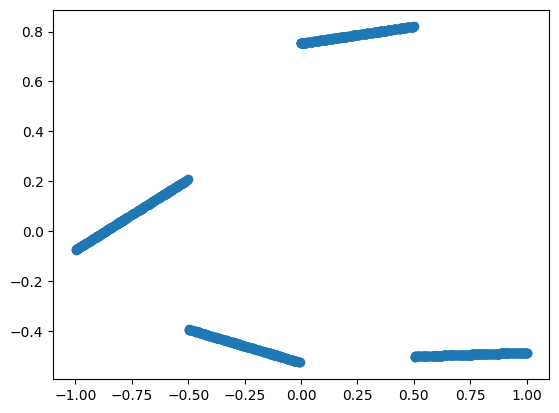

In [3]:
piecewise_func = PiecewiseFunction(lower_bound=-1, upper_bound=1, num_splits=4)

# Sample dataset
inputs = np.random.uniform(-1, 1, 1000)
outputs = np.array([piecewise_func(x) for x in inputs])

# Plot the dataset
plt.scatter(inputs, outputs)

In [4]:
from torch.utils.data import Dataset, DataLoader

# simple dataset given inputs and outputs
class SimpleDataset(Dataset):
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        # convert to float32 and torch tensor
        return np.array([self.inputs[idx]]).astype(np.float32), np.array([self.outputs[idx]]).astype(np.float32)


In [5]:
dims = [1, 10, 10, 1]
temperature = 0.5

model = TreeNode(dims, temperature=temperature)
train_dataset = SimpleDataset(inputs, outputs)

In [ ]:
from torch.optim import Adam
from torch.nn import MSELoss

# simple training loop
epochs = 500
batch_size = 64
lr = 1e-4
optimizer = Adam(model.parameters(), lr=lr)
dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
loss_fn = MSELoss()
model.train()

for epoch in range(epochs):
    for i, (x, y) in enumerate(dataloader):
        optimizer.zero_grad()
        # loss = loss_fn(model(x), y)
        loss = model.expected_loss(x, x.clone(), y, loss_fn).mean()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}, Loss {loss.item()}")




Epoch 0, Loss 0.19568593800067902
Epoch 1, Loss 0.1521119773387909
Epoch 2, Loss 0.12500838935375214
Epoch 3, Loss 0.1754039227962494
Epoch 4, Loss 0.18200072646141052
Epoch 5, Loss 0.21560879051685333
Epoch 6, Loss 0.1939716339111328
Epoch 7, Loss 0.22992952167987823
Epoch 8, Loss 0.19765810668468475
Epoch 9, Loss 0.15994194149971008
Epoch 10, Loss 0.16302169859409332
Epoch 11, Loss 0.1568438708782196
Epoch 12, Loss 0.18707434833049774
Epoch 13, Loss 0.15441790223121643
Epoch 14, Loss 0.15464428067207336
Epoch 15, Loss 0.1341695934534073
Epoch 16, Loss 0.12662748992443085
Epoch 17, Loss 0.15308700501918793
Epoch 18, Loss 0.18423648178577423
Epoch 19, Loss 0.17396655678749084
Epoch 20, Loss 0.20859572291374207
Epoch 21, Loss 0.15040048956871033
Epoch 22, Loss 0.12569548189640045
Epoch 23, Loss 0.17322146892547607
Epoch 24, Loss 0.16352751851081848
Epoch 25, Loss 0.19429638981819153
Epoch 26, Loss 0.1422564685344696
Epoch 27, Loss 0.15783162415027618
Epoch 28, Loss 0.16759280860424042
E

tensor([[-3.5633,  3.7619]], grad_fn=<AddmmBackward0>) tensor([[6.5830e-04, 9.9934e-01]], grad_fn=<SoftmaxBackward0>) False
tensor([[-7.4369,  6.9801]], grad_fn=<AddmmBackward0>) tensor([[5.4798e-07, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) False
tensor([[-2.9559,  3.1394]], grad_fn=<AddmmBackward0>) tensor([[0.0022, 0.9978]], grad_fn=<SoftmaxBackward0>) False
tensor([[-6.4815,  6.0367]], grad_fn=<AddmmBackward0>) tensor([[3.6594e-06, 1.0000e+00]], grad_fn=<SoftmaxBackward0>) False
tensor([[-2.3474,  2.5163]], grad_fn=<AddmmBackward0>) tensor([[0.0077, 0.9923]], grad_fn=<SoftmaxBackward0>) False
tensor([[-5.5227,  5.0935]], grad_fn=<AddmmBackward0>) tensor([[2.4515e-05, 9.9998e-01]], grad_fn=<SoftmaxBackward0>) False
tensor([[-1.5593,  1.7681]], grad_fn=<AddmmBackward0>) tensor([[0.0346, 0.9654]], grad_fn=<SoftmaxBackward0>) False
tensor([[-4.5638,  4.1504]], grad_fn=<AddmmBackward0>) tensor([[1.6421e-04, 9.9984e-01]], grad_fn=<SoftmaxBackward0>) False
tensor([[-0.7511,  1.0036]], gra

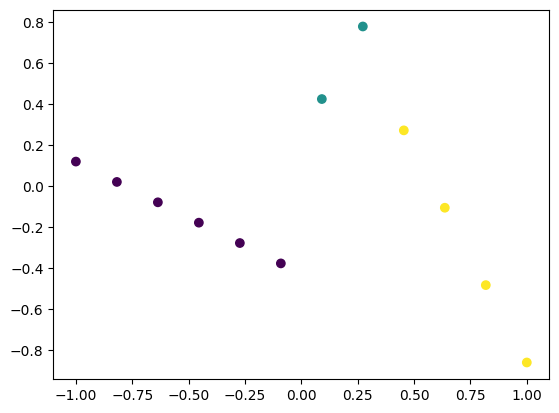

In [15]:
import torch
# eval the model on points linearly spaced in the interval

eval_inputs = np.linspace(-1, 1, 12)
model.eval()
ys = []
labels = []
label_to_int = {}
for x in eval_inputs:
    # y, label = model(torch.tensor([[x]]).float())
    x_tensor = torch.tensor([[x]]).float()
    y, label = model.inference(x_tensor, x_tensor.clone())
    ys.append(y.item())
    
    # map label string to color
    if label not in label_to_int:
        label_to_int[label] = len(label_to_int)
    labels.append(label_to_int[label])
    
print(label_to_int)
    
# plot, and make points with the same label the same color
plt.scatter(eval_inputs, ys, c=labels)
plt.show()

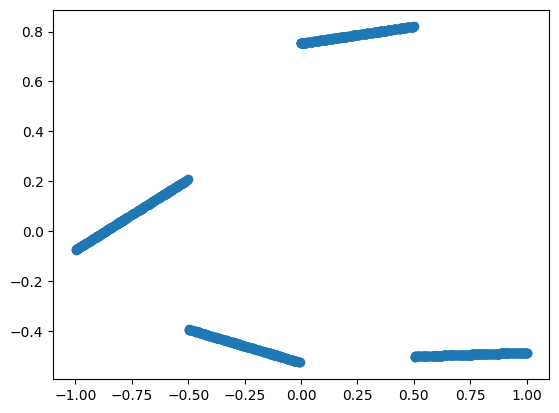

In [8]:
# Plot the dataset
plt.scatter(inputs, outputs)
plt.show()